In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [39]:
# Lendo os Dados 
bd_dados = pd.read_csv('Startups in 2021 end.csv')

# Tamanho da tabel 
bd_dados.shape

(936, 8)

In [40]:
# Conhecendo os primeiros dados 
bd_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [41]:
# Analisando os nomes das colunas 
bd_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [42]:
# Renomeando colunas
bd_dados.rename( columns = {
    'Unnamed: 0':'id',
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor($)',
    'Date Joined': 'Data de Adesão',
    'Country': 'Pais',
    'City':'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investimento',}, inplace=True)

In [43]:
bd_dados.columns

Index(['id', 'Empresa', 'Valor($)', 'Data de Adesão', 'Pais', 'Cidade',
       'Setor', 'Investimento'],
      dtype='object')

In [44]:
bd_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor($)        936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investimento    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [45]:
bd_dados.isnull().sum()

id                 0
Empresa            0
Valor($)           0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investimento       1
dtype: int64

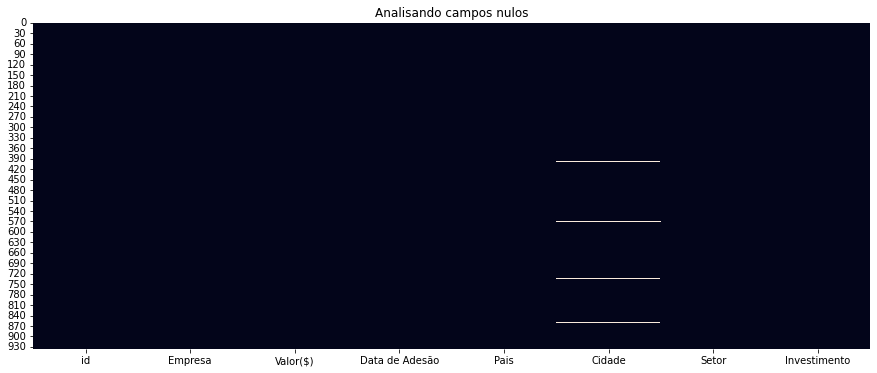

In [46]:
# Grafico 
plt.figure(figsize=(15,6))
plt.title('Analisando campos nulos')
sns.heatmap(bd_dados.isnull(), cbar=False);

In [47]:
# Campos unicos 
bd_dados.nunique()

id                936
Empresa           935
Valor($)          192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investimento      920
dtype: int64

In [48]:
# Visualizando valores unicos
bd_dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [49]:
# Visualizando valores unicos
bd_dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [50]:
# Visualizando valores unicos %
bd_dados['Setor'].value_counts(normalize = 'True')

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

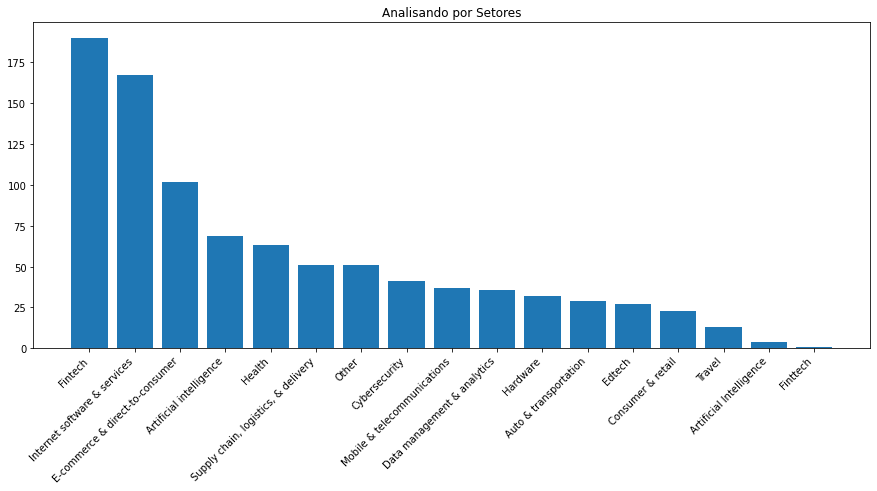

In [51]:
plt.figure(figsize=(15,6))
plt.title('Analisando por Setores')
plt.bar(bd_dados['Setor'].value_counts().index, bd_dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right');

In [52]:
analise = round(bd_dados['Pais'].value_counts(normalize ='True') * 100, 1)
analise

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

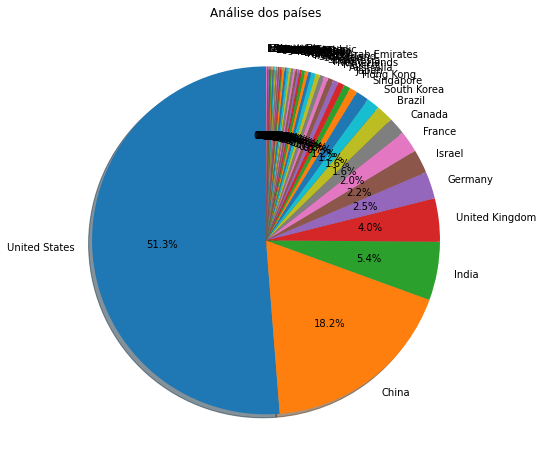

In [53]:
# Analise de Geradores Globais 
plt.figure(figsize = (20,8))
plt.title("Análise dos países")
plt.pie(
    analise, 
    labels = analise.index,
    shadow = True,
    startangle = 90,
    autopct ='%1.1f%%'
);

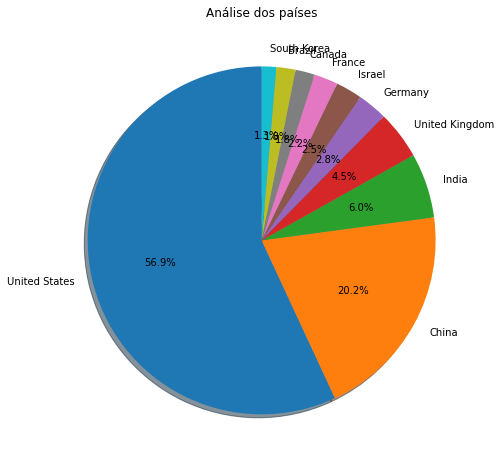

In [54]:
#Análise top 10 Globais
plt.figure(figsize = (20,8))
plt.title("Análise dos países")
plt.pie(
    analise.head(10), 
    labels = analise.index[0:10],
    shadow = True,
    startangle = 90,
    autopct ='%1.1f%%'
);

In [55]:
# Conversão da coluna datas par 'datetime'
bd_dados['Data de Adesão'] = pd.to_datetime(bd_dados['Data de Adesão'])
bd_dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [56]:
# Extraindo ano e mes coluna data 
bd_dados['mes'] = pd.DatetimeIndex(bd_dados['Data de Adesão']).month
bd_dados['ano'] = pd.DatetimeIndex(bd_dados['Data de Adesão']).year
                                   
bd_dados.head()

,id,Empresa,Valor($),Data de Adesão,Pais,Cidade,Setor,Investimento,mes,ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [57]:
# Tabla Análitica

analise_agrupada = bd_dados.groupby( by=['Pais','ano','mes','Empresa']).count()['id'].reset_index()
analise_agrupada

,Pais,ano,mes,Empresa,id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [58]:
analise_agrupada.loc[
    analise_agrupada['Pais'] == 'Brazil']

,Pais,ano,mes,Empresa,id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [59]:
analise_agrupada.loc[
    analise_agrupada['Pais'] == 'United States']

,Pais,ano,mes,Empresa,id
457,United States,2011,4,Vice Media,1
458,United States,2012,6,Fanatics,1
459,United States,2012,12,Avant,1
460,United States,2012,12,SpaceX,1
461,United States,2013,2,Mu Sigma,1
...,...,...,...,...,...
929,United States,2021,12,Iodine Software,1
930,United States,2021,12,Jokr,1
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1


In [60]:
bd_dados['Valor($)'] = pd.to_numeric(bd_dados['Valor($)'].apply( lambda Linha: Linha.replace('$','')))


In [62]:
bd_dados.head()

,id,Empresa,Valor($),Data de Adesão,Pais,Cidade,Setor,Investimento,mes,ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [85]:
 .groupby( by=['Pais','Setor']).sum()['Valor($)'].reset_index()
analise_pais.head()

,Pais,Setor,Valor($)
0,Argentina,Fintech,2.45
1,Australia,E-commerce & direct-to-consumer,1.00
2,Australia,Fintech,5.50
3,Australia,Internet software & services,44.10
4,Austria,Edtech,1.70


In [84]:
analise_pais.sort_values('Valor($)',ascending = False)


,Pais,Setor,Valor($)
172,United States,Fintech,374.84
176,United States,Internet software & services,348.27
178,United States,Other,187.30
25,China,Artificial intelligence,182.47
175,United States,Health,128.21
...,...,...,...
61,Germany,Hardware,1.00
97,Israel,"Supply chain, logistics, & delivery",1.00
68,Hong Kong,E-commerce & direct-to-consumer,1.00
109,Netherlands,Hardware,1.00


In [86]:
analise_valor = analise_pais.sort_values('Valor($)',ascending = False)
analise_valor.head()

,Pais,Setor,Valor($)
172,United States,Fintech,374.84
176,United States,Internet software & services,348.27
178,United States,Other,187.30
25,China,Artificial intelligence,182.47
175,United States,Health,128.21


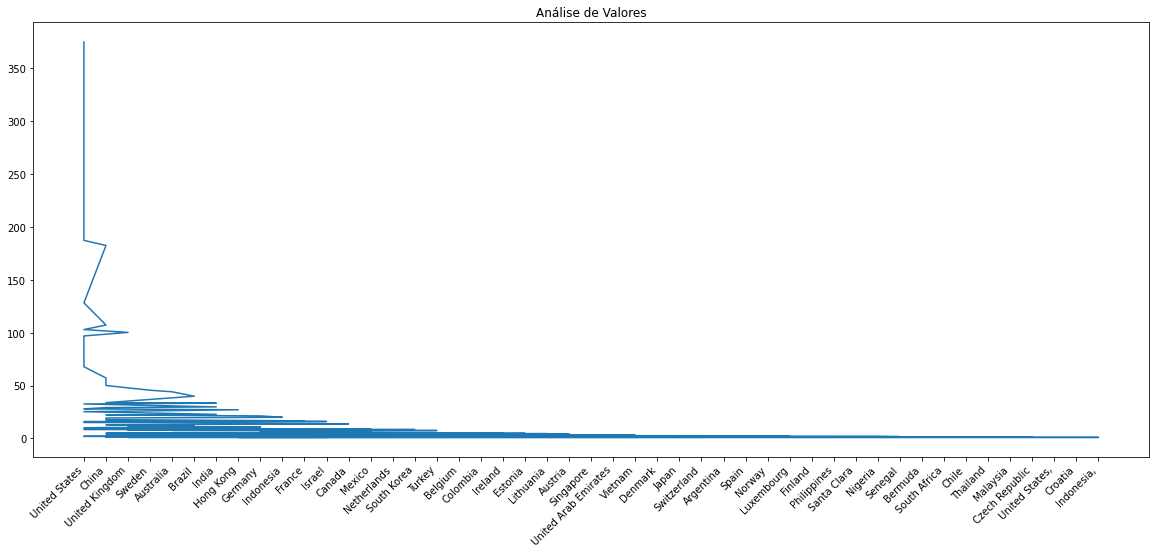

In [92]:
plt.figure(figsize = (20,8))
plt.title("Análise de Valores")
plt.plot(analise_valor['Pais'],analise_valor['Valor($)']);
plt.xticks(rotation = 45, ha='right');